Notebook zu Unit Testing mit Python

Version 1.2, 9. Juni 2023, Informatik, EAH Jena

(c) Christina B. Class


Unittests können nicht direkt in einem Jupyter Notebook implementiert werden. Wir verwenden eine Extension namens `ipython_unittest`.
Wie `jdc` ist diese nicht standardmäßig in Python enthalten und müsste extra installiert werden, um Notebooks lokal laufen zu lassen.
Die folgende Zeile aktiviert diese Extensions für das vorliegende Notebook

In [ ]:
%reload_ext ipython_unittest

Wir verwenden dann die sogenannte *Cell Magic* `%%unittest_main`, um den Unittest in einer Zelle zu definieren und gleichzeitig auszuführen.

Der Python Code, um einen Unittest laufen zu lassen, den Sie für die Implementation in Spyder benötigen, sieht etwas anders aus. Konzentrtieren Sie sich in diesem Notebook daher darauf, wie **einzelne Testmethoden** implementiert werden.

# 1. Beispiel: Testen der Klasse `Student`

Als erstes Beispiel implementieren wir einen Test für die Klasse `Student`:

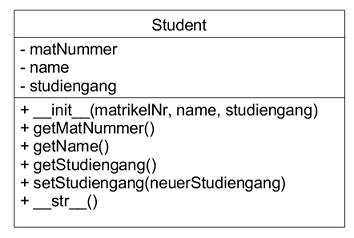

die hier implementiert ist: 

In [ ]:
class Student():
    def __init__(self, number, name, fach):
        self.__number=number
        self.__name=name
        self.__major=fach
        
    def getMatNummer(self):
        return self.__number
        
    def getName(self):
        return self.__name
    
    def getStudiengang(self):
        return self.__major
    
    def setStudiengang(self,neuesFach):
        self.__major=neuesFach
    
    def __str__(self):
        return self.__name+" (Matr. Nr.: "+str(self.__number)+"): studiert "\
                +self.__major

## 1.1 Definition der Test Klasse und Test Fixture

Wir definieren zuerst die Testklasse als Subklasse von `unittest.TestCase`. 

Um die Methoden der Klasse `Student` zu testen, benötigen wir ein Studierendenobjekt. Dieses erzeugen wir am Besten in der `setUp()` Methode als Teil des **Test Fixture**. Wir speichern das Objekt in einem Attribut, so dass wir aus den Testmethoden darauf zugreifen können. 

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def setUp(self):
        self.student=Student(4711,"test student","Informatik")

Durch die Test Fixture haben wir noch keinen Test definiert, das sehen Sie auch daran, dass 0 Tests ausgeführt wurden. Diese müssen wir nun hinzufügen.

## 1.2 Test der getter Methoden

Basierend auf der Spezifikation der Klasse existieren drei *getter* Methoden für die drei Attribute. Wir spezifizieren also drei Tests, um diese Methoden zu testen. Den Rückgabewert vergleichen wir dann mit den Daten des Objektes der Klasse `Student`, das in der Test Fixture definiert wird. 

|Methodenaufruf|erwarteter Rückgabewert|pass/fail|
|---------------------|----------------------|-----------|
|`getMatNummer()`| 4711|pass|
|`getName()`|test student |pass|
|`getStudiengang()`|Informatik|pass|

Wir schreiben nun eine Testklasse, um die Methode `getMatNummer()` zu testen:

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def setUp(self):
        self.student=Student(4711,"test student","Informatik")
        
    def testMatNr(self):
        self.assertEqual(self.student.getMatNummer(),4711)

Es wurde ein Test erfolgreich durchgeführt.

**Aufgabe:** Ändern Sie in obigem Code den Namen der Testmethode zu `TestMatNr()` und testen Sie den Code erneut.

**Hinweis:** Wie Sie in obiger Aufgabe beobachten konnten, wurde kein Test ausgeführt. Bei Unit Tests alle Methoden ausgeführt, deren Namen mit `test` beginnen. Methoden, deren Namen anders beginnen, werden nicht ausgeführt.

**Aussagekraft des Tests:** Wir haben einen erfolgreichen Test für die getter Methode ausgeführt. 
- Um sicherzugehen, dass der Test wirklich funktioniert, sollten wir diesen immer für verschiedene Objekte aufrufen. Nur so können wir sicherstellen, dass die Methode nicht vielleicht einen konstanten Wert zurückgibt, also z.B. immer die 4711 egal welche Matrikelnummer ein Studentenobjekt hat.
- Ist der Test nicht erfolgreich, können wir daraus nicht schließen, dass der Fehler in der getter Methode liegt. Es wäre ja möglich, dass die `__init__()` Methode falsch implementiert ist. In der vorliegenden Spezifikation steht, dass die Matrikelnummer eine ganze Zahl ist. Wird sie als Zeichenkette abgespeichert, wäre der Test nicht bestanden, auch wenn die getter Methode richtig implementiert ist. Unser Test testet also eigenlich sowohl einen Teil der `__init__()` als auch einen Teil der getter Methode. Wäre nicht spezifiziert, ob die Nummer als ganze Zahl oder Zeichenkette abgespeichert wird, müsste der Test auf verschiedene mögliche Rückgabewerte testen:
`self.assertIn(self.student.getMatNummer(),[4711,'4711'])`

**Aufgabe:** Ergänzen Sie die Testklasse um zwei Methoden, um die getter Methoden für den Namen und den Studiengang zu testen.

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def setUp(self):
        self.student=Student(4711,"test student","Informatik")
        
    def testMatNr(self):
        self.assertEqual(self.student.getMatNummer(),4711)
        
    # Ihr Code

## 1.3 Test der setter Methode

Eine setter Methode wie `setStudiengang()` hat keinen Rückgabewert und kann daher nicht direkt getestet werden. Sie hat ja keinen Rückgabewert, den wir mit einem erwarteten Wert vergleichen können. Für den Test rufen wir daher nach der setter Methode die getter Methode aus, um den Rückgabewert mit dem neuen Studiengang vergleichen zu können.

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def setUp(self):
        self.student=Student(4711,"test student","Informatik")
        
    def testMatNr(self):
        self.assertEqual(self.student.getMatNummer(),4711)
        
    def testSetStudiengang(self):
        self.student.setStudiengang("CS")
        self.assertEqual(self.student.getStudiengang(),"CS")

**Aussagekraft des Tests**: Hier gilt, wie oben diskutiert, dass der Test nicht nur die setter Methode testet, da wir ja die getter Methode aufrufen müssen, um zu einem Testurteil zu gelangen. Nur wenn die getter Methode erfolgreich getestet wurde, sind Aussagen in Bezug auf die setter Methode möglich.

## 1.4 Test der `__str__()` Methode

Die `__str__()` Methode gibt eine Zeichenkette zurück. In unserer Spezifikation ist angegeben, welche Elemente die Zeichenkette enthalten muss und wie sie aussieht. Man könnte jetzt natürlich mit `assertEqual()` genau auf diese Zeichenkette überprüfen. Die Zeichenkette muss dann aber exakt der in `assertEqual()` angegebenen Zeichenkette(n) entsprechen. Der Test wäre z.B. nicht bestanden, wenn es eine unterschiedliche Anzahl von Leerzeichen gibt: 

In [ ]:
'hallo welt' == 'hallo  welt'

Muss die Zeichenkette exakt so aussehen, einschl. der gleichen Anzahl von Leerzeichen, würde man natürlich `assertEqual()` verwenden. 

**Zur Information:** Es gibt mit **regulären Ausdrücken** die Möglichkeit, Zeichenketten ungefähr zu beschreiben, also gewisse Freiheiten offenzulassen (z.B.: Die Zeichenkette besteht aus 'hallo' gefolgt von mindestens einem Leerzeichen, gefolgt von 'welt'). Wir werden hier nicht näher darauf eingehen.   

Eine andere Möglichkeit ist, zu überprpüfen, ob die wesentlichen Elemente (Matrikelnummer, Name und Stundiengang) in der Zeichenkette enthalten sind, ist die Verwendung von `assertIn()`:

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def setUp(self):
        self.student=Student(4711,"test student","Informatik")
        
    def testMatNr(self):
        print('testMatNr...')
        self.assertEqual(self.student.getMatNummer(),4711)
        
    def testSetStudiengang(self):
        print('testSetStudiengang...')
        self.student.setStudiengang("CS")
        self.assertEqual(self.student.getStudiengang(),"CS")
        
    def testStr(self):
        print('testStr...')
        s=str(self.student)
        self.assertIn('Informatik',s)
        self.assertIn("4711",s)
        self.assertIn("test student",s)    

**Hinweis:** Wie Sie obigem Output entnehmen können, werden die Testmethoden von oben nach unten aufgerufen. `testStr()` wird also **nach** `testSetStudiengang()` aufgerufen. Dennoch müssen wir überprüfen, ob das Wort Informatik und nicht CS im zurückgegebenen String ist. Denn die **Test Fixture** also `setUp()`, wir **zu Beginn jeder Test Methode erneut aufgerufen**: 

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def setUp(self):
        print('setUp....................................')
        self.student=Student(4711,"test student","Informatik")
        
    def testMatNr(self):
        print('testMatNr...')
        self.assertEqual(self.student.getMatNummer(),4711)
        
    def testSetStudiengang(self):
        print('testSetStudiengang...')
        self.student.setStudiengang("CS")
        self.assertEqual(self.student.getStudiengang(),"CS")
        
    def testStr(self):
        print('testStr...')
        s=str(self.student)
        self.assertIn('Informatik',s)
        self.assertIn("4711",s)
        self.assertIn("test student",s)    

# 2. Testen einer  Funktion `quotient()` 

Wir schreiben eine Funktion `quotient()`, die den Quotienten zweier Parameter berechnet und zurück gibt. Basierend auf Parameterwerten löst die Funktion zwei mögliche Ausnahmen aus:  

In [ ]:
def quotient(a,b):
    try:
        c=a/b
        return c
    except TypeError:
        raise TypeError('Falscher Datentyp')
    except ZeroDivisionError:
        raise ZeroDivisionError('Division durch Null')

Die deutsche Fehlerinformation finden Sie am Ende der Informationen zur Ausnahme. Sehen Sie sich das an einem Beispiel an:

In [ ]:
#TypeError
erg=quotient(1,'hallo')

In [ ]:
#ZeroDivisionError
erg=quotient(1,0)

## 2.1  Testen von `float` Werten

Wir können diese Funktion nun testen, indem wir die Funktion direkt aufrufen. Wir können also auf den Test Fixture, und damit die Methode `setUp()`, verzichten.

Ein erster Versuch lautet wie folgt:

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def testRechnung(self):
        self.assertEqual(quotient(4,2),2)

Fügen wir eine weitere Rechnung ein:

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def testRechnung(self):
        self.assertEqual(quotient(4,2),2)
        self.assertEqual(quotient(7,3),2.33333)

Das Ergebnis des Vergleichs von  Kommazahlen hängt von der Anzahl der verwendeten Nachkommstellen ab. `7/3` kann nicht exakt dargestellt werden. Wenn nicht spezifiziert wird, wieviele Nachkommastellen eine Zahl in diesem Fall haben soll, verwenden wir die Methode `assertAlmostEqual()` für den Vergleich.

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def testRechnung(self):
        self.assertEqual(quotient(4,2),2.0)
        self.assertAlmostEqual(quotient(7,3),2.33333)

Auch dieser Test ist falsch, weil wir zu wenig Nachkommastellen angegeben haben. Python vergleicht sieben Stellen. Entweder wir geben mehr Stellen an oder aber wir reduzieren die Anzahl betrachteter Nachkommastellen mit dem optionalen Parameter `places`: 

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def testRechnung(self):
        self.assertEqual(quotient(4,2),2.0)
        self.assertAlmostEqual(quotient(7,3),2.33333, places=5)
        self.assertAlmostEqual(quotient(7,3),2.3333333)

## 2.2 Testen von Ausnahmen

Die Funktion `quotient()` hat zwei mögliche Ausnahmen. Ausnahmen werden mit Hilfe der Methode `assertRaises()` gestestet. Diese hat die folgenden Parameter:
- die **Ausnahme**
- der Name der **Funktion / Methode**
- die **Positionsparamter**, durch Kommata getrennt, die beim Funktionsaufruf übergeben werden
- die **Schlüsselwortparamter**, durch Kommata getrennt, die beim Funktionsaufruf übergeben werden

Wir fügen nun eine neue Methode hinzu, um die `TypeError` Ausnahme zu testen:

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def testRechnung(self):
        self.assertEqual(quotient(4,2),2.0)
        self.assertAlmostEqual(quotient(7,3),2.33333, places=5)
        self.assertAlmostEqual(quotient(7,3),2.3333333)
        
    def testTypeError(self):
        # der getestete Funktionsaufruf lautet:
        # quotient(1,'1')
        # Postitionsparameter
        self.assertRaises(TypeError,quotient,1,'1')
        # der TypeError kann ja bei beiden Paramtern auftreten
        # der getestete Funktionsaufruf lautet:
        # quotient(b=1,a='a')
        # Schluesselwortparameter
        self.assertRaises(TypeError,quotient,b=1,a='1')

**Aufgabe** Fügen Sie eine Testmethode hinzu, um zu überprüfen, ob die `ZeroDivisionError` Ausnahme ausgelöst wird. 

In [ ]:
%%unittest_main
class TestKlasse1(unittest.TestCase):
    def testRechnung(self):
        self.assertEqual(quotient(4,2),2.0)
        self.assertAlmostEqual(quotient(7,3),2.33333, places=5)
        self.assertAlmostEqual(quotient(7,3),2.3333333)
        
    def testTypeError(self):
        # der getestete Funktionsaufruf lautet:
        # quotient(1,'1')
        # Postitionsparameter
        self.assertRaises(TypeError,quotient,1,'1')
        # der TypeError kann ja bei beiden Paramtern auftreten
        # der getestete Funktionsaufruf lautet:
        # quotient('1',1)
        # Schluesselwortparameter
        self.assertRaises(TypeError,quotient,b=1,a='1')
        
    # Ihr Code

*Ende des Notebooks*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Dieses Notebook wurde von Christina B. Class für die Lehre an der EAH Jena erstellt. Es ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.